# EDA - Exploratory data analysis

We are aiming to do EDA(exploratory data analysis) on a dataset that contains data about the sleep efficiency.

### Import dataset and head()
Import dataset and display the top 2 rows

In [83]:
import pandas as pd

data = pd.read_csv('Sleep_Efficiency.csv')

data.head(2)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0


### Data shape
We are checking the number of columns and rows.
At first we have 15 columns/features and 452 rows/observations.

In [84]:
data.shape

(452, 15)

### Data info
Now we want to see what type of data we are having.
We have some columns that are of **object** type. Usually this means we need to take a closer look at these columns and see if we need to do some transformations.
In our dataset we have:
- **Gender**, **Smoking status** - this needs to be transformed in a binary format
- **Bedtime**, **Wakeup time** - need to be transformed in a datetime format

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

### Data describe
We can get the basic statistics about the numeric data in a DataFrame, like the average, spread, and distribution of the numbers. It's useful for getting a quick summary of your data.

In [86]:
data.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,436.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,23.002212,52.960177,24.831858,1.641204,23.653396,1.245413,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.972466,15.561713,15.150774,1.356762,30.202785,1.643336,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,20.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,51.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,60.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,27.000000,63.000000,27.250000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,56.000000,4.000000,200.000000,5.000000,5.000000


### Data duplicates
We can check if we have duplicatest in our dataset.

We can see that we do not have any duplicates.

In [87]:
data.duplicated().any()

False

# Univariate analysis

### ID column
We can check how many distinct values are in the **ID** column.

We can see that there is a one value for every ID. This means that probably this is not a representative column for our dataset and we could remove it.

In [88]:
data['ID'].value_counts()

ID
1      1
284    1
310    1
309    1
308    1
      ..
147    1
146    1
145    1
144    1
452    1
Name: count, Length: 452, dtype: int64

### Gender column
We can check the distribution of the data based on **Gender**. What we can observe is that the data is almost equally distributed between genders.

In [89]:
data.Gender.value_counts()

Gender
Male      228
Female    224
Name: count, dtype: int64

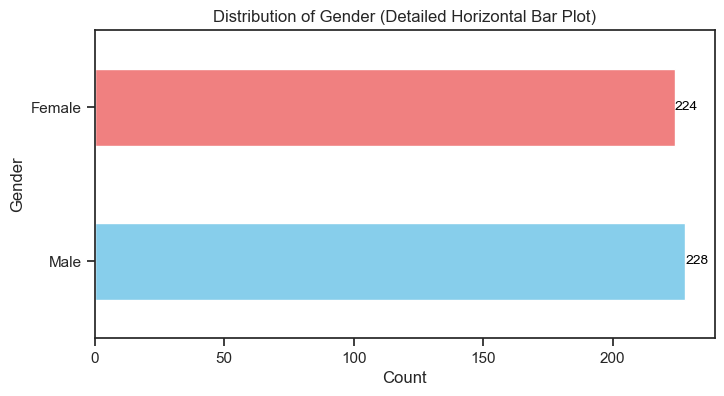

In [90]:
import matplotlib.pyplot as plt
# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()

# Set a larger figure size for more detail
plt.figure(figsize=(8, 4))

# Create a horizontal bar plot with increased detail
gender_counts.plot(kind='barh', color=['skyblue', 'lightcoral'], width=0.5)

# Add data labels to the bars
for index, value in enumerate(gender_counts):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Distribution of Gender (Detailed Horizontal Bar Plot)')

# Display the plot
plt.show()

We can transform string binaries to numeric binaries. We will do this for **Gender** and **Smoking status**

In [91]:
data['Gender'] = data['Gender'].map({'Female':0, 'Male':1})
data['Smoking status'] = data['Smoking status'].map({'Yes': 1, 'No': 0})

data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,1,3.0
1,2,69,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,1,3.0
2,3,40,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,1,1.0
4,5,57,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


### Age column


We can describe the values from the *Age* column

In [92]:
data['Age'].describe()

count    452.000000
mean      40.285398
std       13.172250
min        9.000000
25%       29.000000
50%       40.000000
75%       52.000000
max       69.000000
Name: Age, dtype: float64

We can check the age distribution.

We can see that the distribution is a normal distribution and we do not have invalid values, like negative age and also we don not have extreme values.

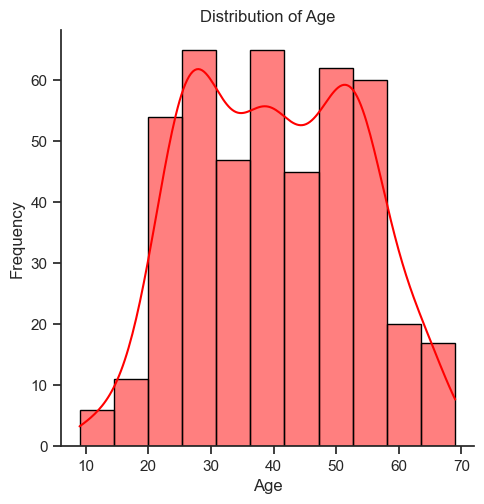

In [93]:
import seaborn as sns
sns.displot(data['Age'], kde=True, color='red', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()

We can also remove the subjects that are under 18 as they should not smoke or drink.

In [94]:
# Identify subjects with age less than 18
subjects_under_18_indices = data[data['Age'] < 18].index
print(len(subjects_under_18_indices))
data.drop(subjects_under_18_indices, inplace=True)

9


We can check again how our distribution looks like

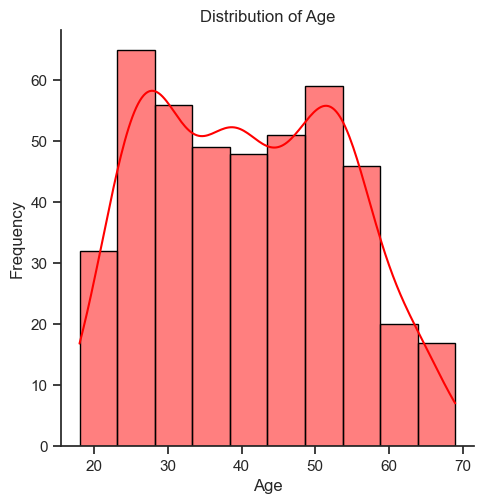

In [95]:
sns.displot(data['Age'], kde=True, color='red', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()

### Bedtime column

We need to convert the value from **Bedtime** into pandas datetime format so we can extract more detailed information.

We need to extract:
- year
- month
- day
- hour

And then we are removing the initial **Bedtime** column.

In [96]:
data['Bedtime'] = pd.to_datetime(data['Bedtime'])

data['Bedtime_year'] = data['Bedtime'].dt.year
data['Bedtime_month'] = data['Bedtime'].dt.month
data['Bedtime_day_of_week'] = data['Bedtime'].dt.day_of_week
data['Bedtime_hour'] = data['Bedtime'].dt.hour

data.drop('Bedtime', axis=1, inplace=True)
data.head(2)

,ID,Age,Gender,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_year,Bedtime_month,Bedtime_day_of_week,Bedtime_hour
0,1,65,0,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,1,3.0,2021,3,5,1
1,2,69,1,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,1,3.0,2021,12,6,2


We are checking how manys year we have in our data and we observe that we have only the year *2021* and we can remove that column.

In [97]:
print(data['Bedtime_year'].unique())

data.drop('Bedtime_year', axis=1, inplace=True)
data.head(2)

[2021]


,ID,Age,Gender,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_month,Bedtime_day_of_week,Bedtime_hour
0,1,65,0,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,1,3.0,3,5,1
1,2,69,1,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,1,3.0,12,6,2


If we think how months can influence the sleep hours, we could see what data we have in the winter because the suns sets earlier in the winter. We can group the data into winter months or not.

And we can do the same for the days of the week. We can group the day into weekend or not.

We will also remove the initial columns.

In [98]:
data['IsWinter'] = data['Bedtime_month'].isin([12, 1, 2]).astype(int)
data['IsWeekend'] = data['Bedtime_day_of_week'].isin([5, 6]).astype(int)

data.drop(['Bedtime_month', 'Bedtime_day_of_week'],axis=1, inplace=True)
data.head(2)

,ID,Age,Gender,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_hour,IsWinter,IsWeekend
0,1,65,0,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,1,3.0,1,0,1
1,2,69,1,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,1,3.0,2,1,1


### Wakeup time

We have **Sleep duration** and **Bedtime_hour** the value from **Wakeup time** are redundant to our data. Because we can calculate the hours for wakeup based on bedtime hour and sleep duration

In [99]:
data.drop('Wakeup time', axis=1, inplace=True)

data.head(2)

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_hour,IsWinter,IsWeekend
0,1,65,0,6.0,0.88,18,70,10,0.0,0.0,0.0,1,3.0,1,0,1
1,2,69,1,7.0,0.66,24,28,53,3.0,0.0,3.0,1,3.0,2,1,1


### Sleep duration

We are checking the distribution of **Sleep duration**

We can see from the plot that we do not have outliers and skewed data.

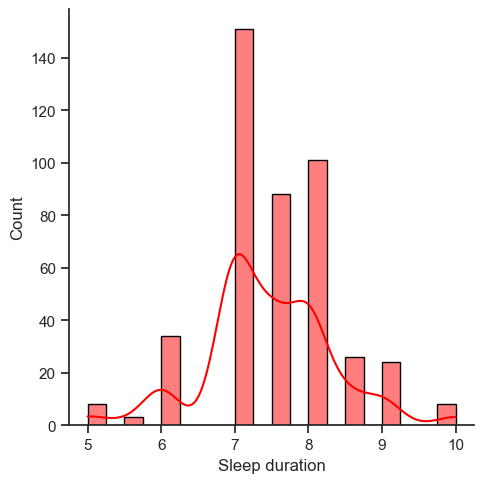

In [100]:
data['Sleep duration'].value_counts()

sns.displot(data['Sleep duration'], kde=True, color='red', edgecolor='black')

### Sleep efficiency

We can observe in the plot below what we do not have outliers and skewed data.

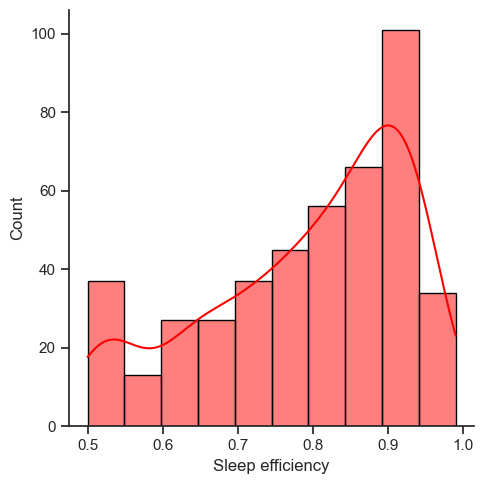

In [101]:
data['Sleep efficiency'].value_counts()
sns.displot(data['Sleep efficiency'], kde=True, color='red', edgecolor='black')

We can do the same thing for **Smoking status**. We can see that around 64% of the subjects are non-smokers and the other are smokers. Even though the distribution is unbalanced, we still have a good percentage of smoking users.

If we think that this unbalanced distribution is not representative to our data, we can artificially increase the number of smoker data with some resampling technique or cost-sensitive algorithms.

In [102]:
data['Smoking status'].value_counts(normalize=True)

Smoking status
0    0.647856
1    0.352144
Name: proportion, dtype: float64

### Caffeine column analysis

We can look at the distribution of the **Caffeine consumption** with a histogram plot. And we can see that we have some outliers. Very few people are consuming a large amount of coffee.

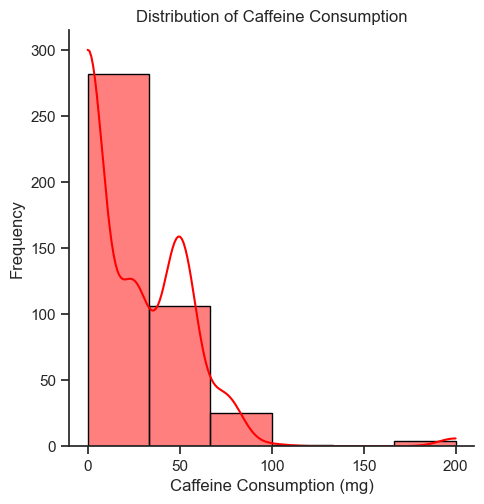

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a displot
sns.displot(data['Caffeine consumption'], bins=6, kde=True, color='red', edgecolor='black')

# Adding labels and title
plt.xlabel('Caffeine Consumption (mg)')
plt.ylabel('Frequency')
plt.title('Distribution of Caffeine Consumption')

# Show the plot
plt.show()

We can see that there are 4 people that are consuming around 200 units of coffee.

In [104]:
data['Caffeine consumption'].value_counts()

Caffeine consumption
0.0      203
50.0     106
25.0      79
75.0      25
200.0      4
100.0      1
Name: count, dtype: int64

# Bivariate and multivariate analysis

### Relplot

We can check the distribution of the *sleep efficiency* by *gender* and how it evolves with the *age*.

One thing that we see is that the sleep efficiency for females is decreasing after 50 years.

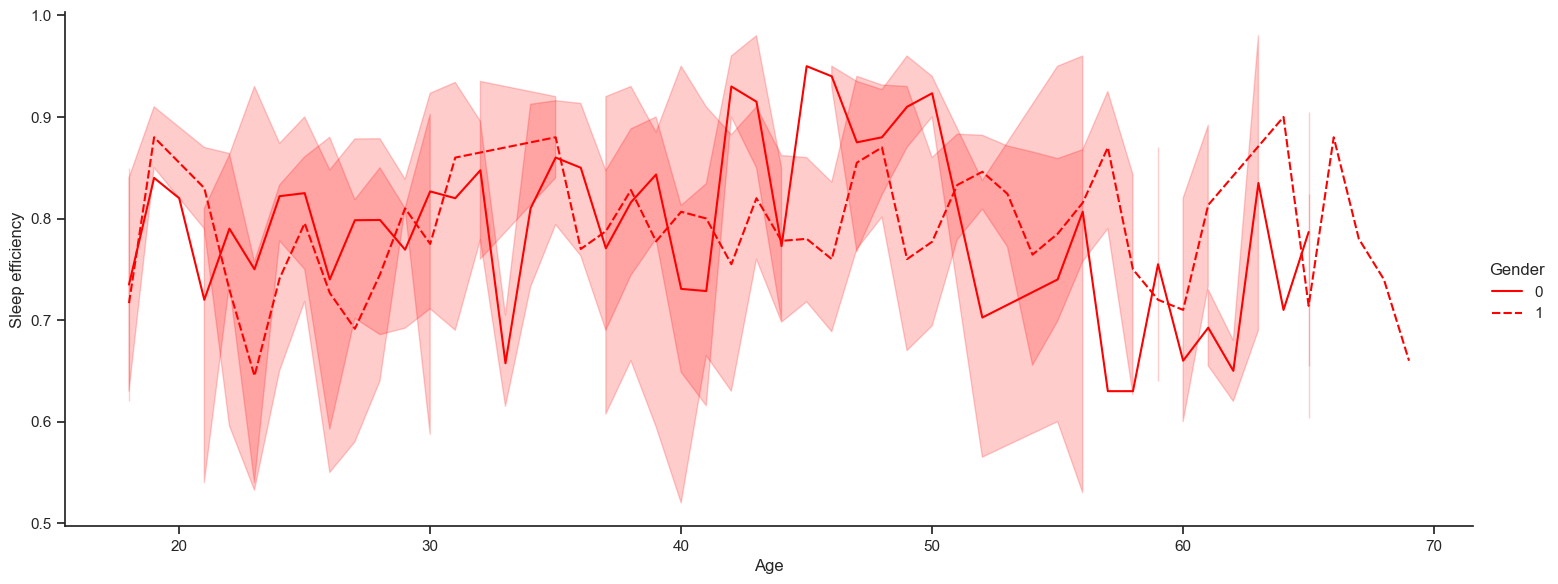

In [105]:
sns.relplot(
    data=data, kind="line",
    x="Age", y="Sleep efficiency", style="Gender", color="red", height=6, aspect=2.5
)
plt.show()

### Lineplot

We can check how caffeine consumption is influencing the sleep efficiency.

It does not seem to be a relation between caffeine consumption and sleep efficiency.

<Axes: xlabel='Caffeine consumption', ylabel='Sleep efficiency'>

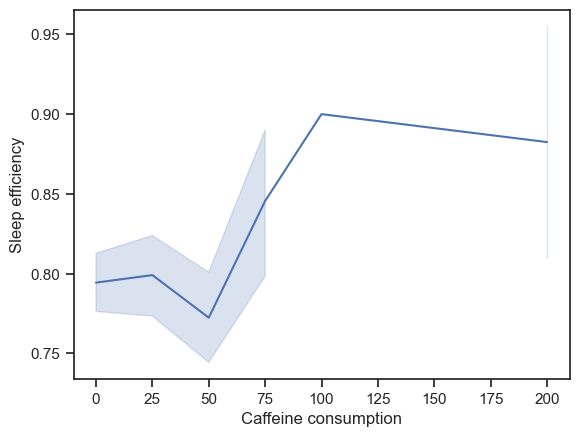

In [106]:
sns.lineplot(x=data['Caffeine consumption'], y=data['Sleep efficiency'])

### Heatmaps

We can check the correlation between the numeric features/columns from our dataset.

From the heatmap we can observe that most of the features are not correlated, except a couple of them:
- There is a ***strong positive*** correlation between *Deep sleep percentage* and *Sleep efficiency*. This means that the sleep efficiency is increasing if the deep sleep is increasing.
- There is a ***strong negative*** correlation between *Light sleep percentage* and *Sleep efficiency*. This means that the sleep efficiency is decreasing if the light sleep is increasing.
- There is a ***moderate positive*** correlation between *Alcohol consumption* and *Light sleep percentage*. This means that the light sleep is increasing if the alcohol consumption is increasing.
- There is a ***small positive*** correlation between *Smoking status* and *Light sleep percentage*. This means that the light sleep is slowly increasing if the subject are smoking.

<Axes: >

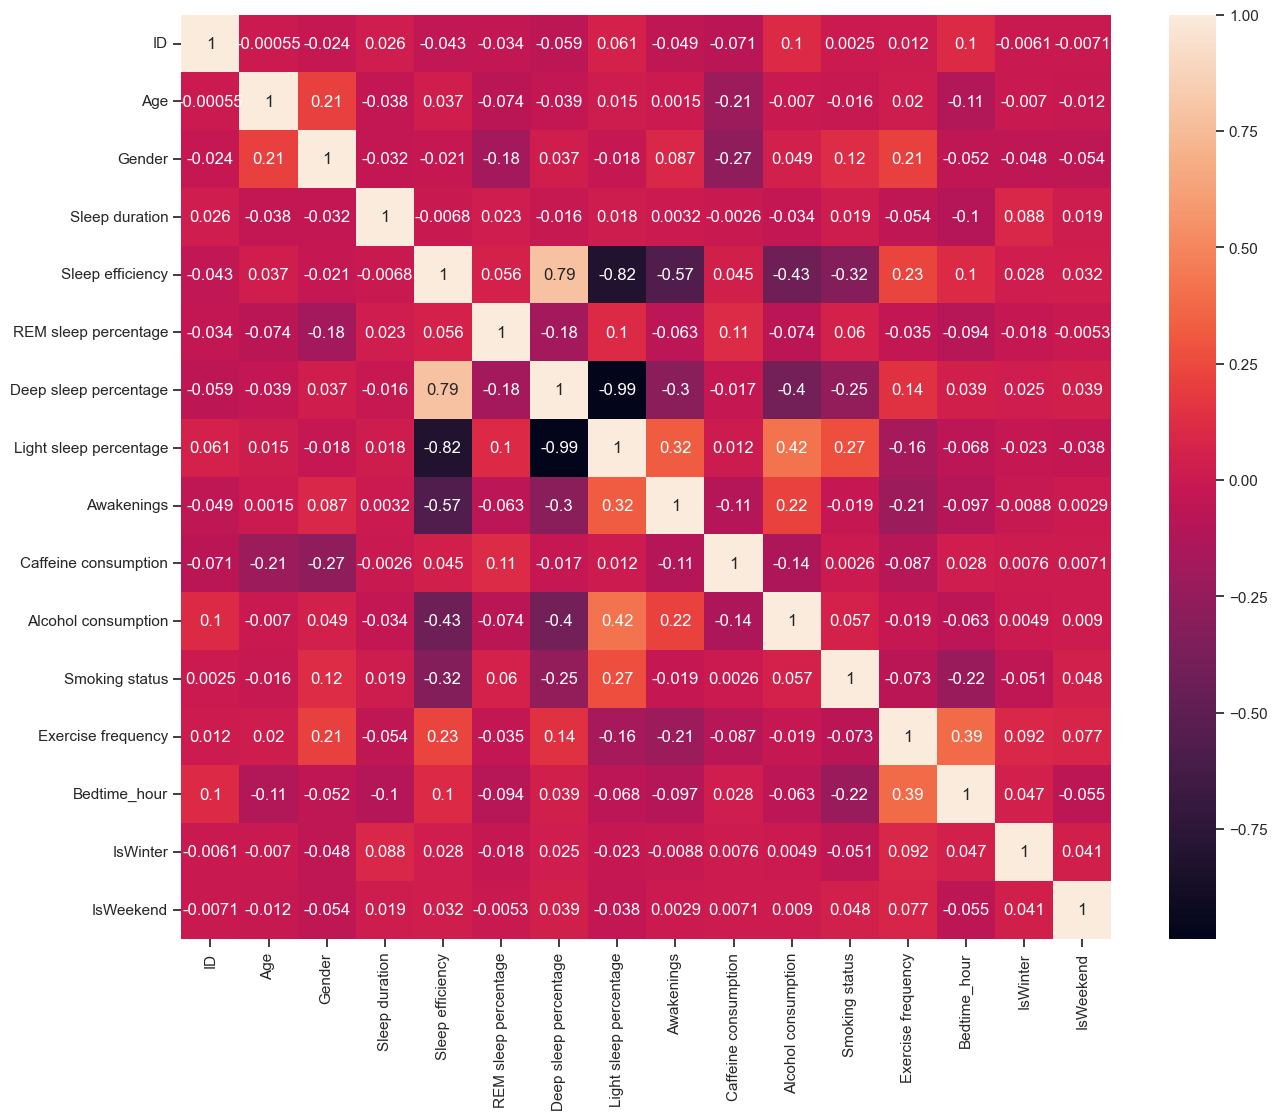

In [107]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True)

We can also do a heatmap only for a subset of columns if needed.
In our case there seems to be no correlation between *Age* and *Bedtime hour*

<Axes: >

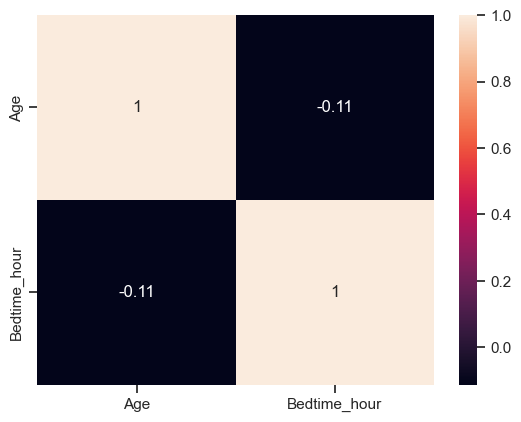

In [108]:
selected_columns = ['Age', 'Bedtime_hour']

corr_matrix = data[selected_columns].corr()

sns.heatmap(corr_matrix, annot=True)

### Dealing with null values

Describe only the columns that have null values.

In [109]:
columns_with_nulls = data[data.columns[data.isnull().any()]]

columns_with_nulls.describe()

,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,423.000000,418.000000,429.000000,437.000000
mean,1.628842,24.043062,1.219114,1.828375
std,1.360172,30.320717,1.627310,1.419174
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,1.000000,25.000000,0.000000,2.000000
75%,3.000000,50.000000,2.000000,3.000000
max,4.000000,200.000000,5.000000,5.000000


We checked what is the proportion of features with null values in the total number of rows/observations

In [110]:
percent_missing = data.isnull().sum() * 100 / len(data)

nr_missing_values = data.isnull().sum()

null_values_df = pd.DataFrame({
    'number_missing': nr_missing_values,
    'percent_missing': percent_missing
})

only_null_df = null_values_df[null_values_df['number_missing'] > 0]

print(only_null_df)

                      number_missing  percent_missing
Awakenings                        20         4.514673
Caffeine consumption              25         5.643341
Alcohol consumption               14         3.160271
Exercise frequency                 6         1.354402


We are checking if there are multiple null values on one row.

In [111]:
#Identify rows with null values for more than one feature
rows_with_multiple_nulls = data[data.isnull().sum(axis=1) > 1]

# Display the result
rows_with_multiple_nulls


,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_hour,IsWinter,IsWeekend
404,405,24,1,6.0,0.64,22,23,54,NaN,NaN,3.0,1,1.0,2,0,1


We will remove the row that has multiple null values.

In [112]:
#remove row that has multiple null values
data.drop(index=rows_with_multiple_nulls.index, axis=0, inplace=True)

#check if the row has been removed
print(data[data.isnull().sum(axis=1) > 1])

Empty DataFrame
Columns: [ID, Age, Gender, Sleep duration, Sleep efficiency, REM sleep percentage, Deep sleep percentage, Light sleep percentage, Awakenings, Caffeine consumption, Alcohol consumption, Smoking status, Exercise frequency, Bedtime_hour, IsWinter, IsWeekend]
Index: []


#### Replace with Mean value


We can describe *Caffeine consumption*

In [113]:
caffeine_data = data[['Caffeine consumption']]
caffeine_data.describe()

,Caffeine consumption
count,418.000000
mean,24.043062
std,30.320717
min,0.000000
25%,0.000000
50%,25.000000
75%,50.000000
max,200.000000


We will replace null values from *Caffeine consumption* with the mean value

In [114]:
import numpy as np
data['Caffeine consumption'] = data['Caffeine consumption'].fillna(np.round(data['Caffeine consumption'].mean(), 0))

data['Caffeine consumption'].isnull().sum()

0

We can describe the column again to see how the metrics are changed after replacing the null values.

In [115]:
caffeine_data.describe()

,Caffeine consumption
count,418.000000
mean,24.043062
std,30.320717
min,0.000000
25%,0.000000
50%,25.000000
75%,50.000000
max,200.000000


#### Drop insignifiant null values

Since the percentage of null values in the **Exercise frequency** is around 1.3% we can drop the rows with null values.

In [116]:
data = data.dropna(subset=['Exercise frequency'])
data['Exercise frequency'].isnull().sum()

0

#### Replace with distributed percentage

We want to replace the null values from **Alcohol consumption** column. What we can do is to see the percentages distribution of every unique value from **Alcohol consumption** column in the rows that do not have null values. We will fill the null values with the same distribution that we found in the overall data.

In [117]:
alcohol_consumption_percentages = round(data['Alcohol consumption'].value_counts(normalize=True), 3)
print(alcohol_consumption_percentages)

Alcohol consumption
0.0    0.543
1.0    0.130
3.0    0.114
2.0    0.092
5.0    0.071
4.0    0.050
Name: proportion, dtype: float64


Because we have some small probabilities for some of the values, we want to make sure that even the small probabilities are taken into account. So we are setting a minimum threshold for the probabilities.

In [118]:
import numpy as np
# Set a minimum probability for all values (e.g., 0.01)
min_probability = 0.09

# Adjust probabilities, ensuring they are not less than the minimum
adjusted_probabilities = np.maximum(alcohol_consumption_percentages.values, min_probability)

# Normalize adjusted probabilities to ensure they sum to 1
adjusted_probabilities /= adjusted_probabilities.sum()

print(adjusted_probabilities)

[0.51274788 0.12275732 0.10764873 0.08687441 0.08498584 0.08498584]


Then we replace the missing values for the **Alcohol consumption** with the predicted values based on the overall probabilities.

In [119]:
# Calculate the percentage distribution of non-missing values
percentage_distribution = data['Alcohol consumption'].value_counts(normalize=True)

# Select only the rows with missing values in the 'alcohol_consumption' column
missing_values_rows = data[data['Alcohol consumption'].isnull()]

# Generate random values based on the same percentage distribution
random_values = np.random.choice(percentage_distribution.index, size=len(missing_values_rows), p=adjusted_probabilities)

# Fill missing values with the generated random values
data.loc[data['Alcohol consumption'].isnull(), 'Alcohol consumption'] = random_values

Then we can check that we don't have any null values in the **Alcohol consumption** column

In [120]:
data['Alcohol consumption'].isnull().sum()

0

### Pairplots

We can create a pairplot on *Gender* and *Age* against some lifestyle features, like *Alcohol consumption* and *Smoking status*.

We can observe that in the male subjects are predominant until the age around 45 years and the women after that age.
We can see that the alcohol consumption is increasing while the age is increasing in the male subject while in the female subjects is decreasing.
Also it seems that the smoking status in women subjects is quite constant over the years, while in the male subjects is decreasing.

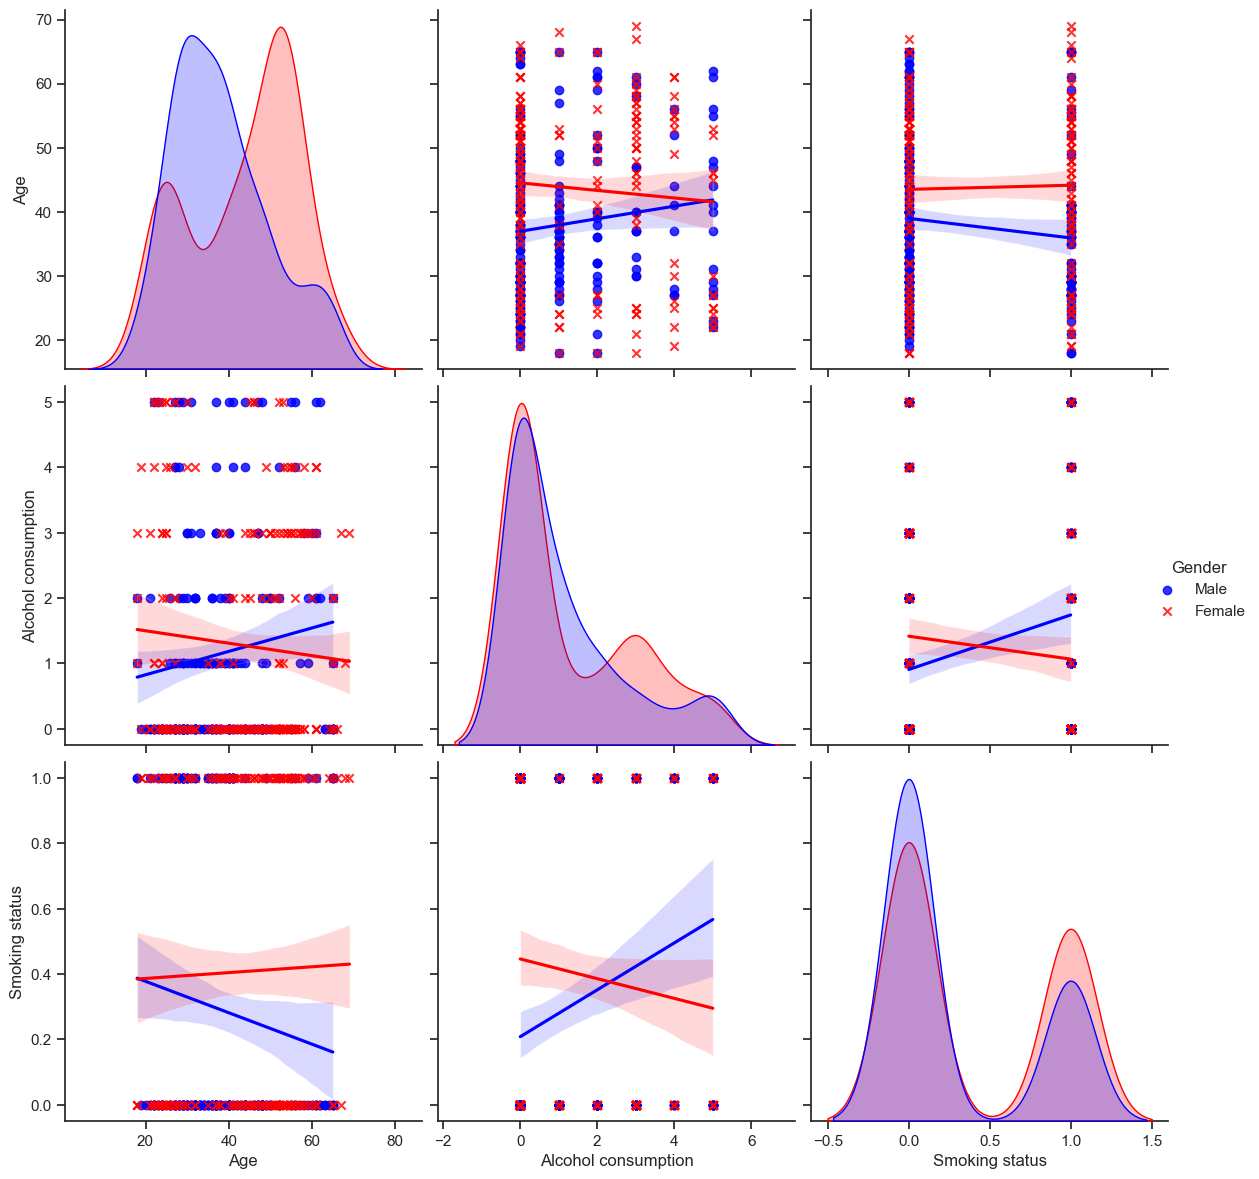

In [121]:
custom_palette = {0: 'blue', 1: 'red'}
sns.set(style="ticks")
plot = sns.pairplot(data[['Gender', 'Age', 'Alcohol consumption','Smoking status']],height=4, kind='reg', hue='Gender', diag_kind='kde', markers=["o", "x"], palette=custom_palette)

# Add legend
plot._legend.set_title('Gender')
legend_labels = {0: 'Male', 1: 'Female'}
for t, l in zip(plot._legend.texts, legend_labels.values()):
    t.set_text(l)

plt.show()

We can do a pairplot on *Gender* and *Age* against the positive indicators of positive sleep indicators.

We can observe a general pattern in which the male subjects are performing better on positive sleep indicators in the earlier years and worse in the later years. And is the opposite on the female subjects.

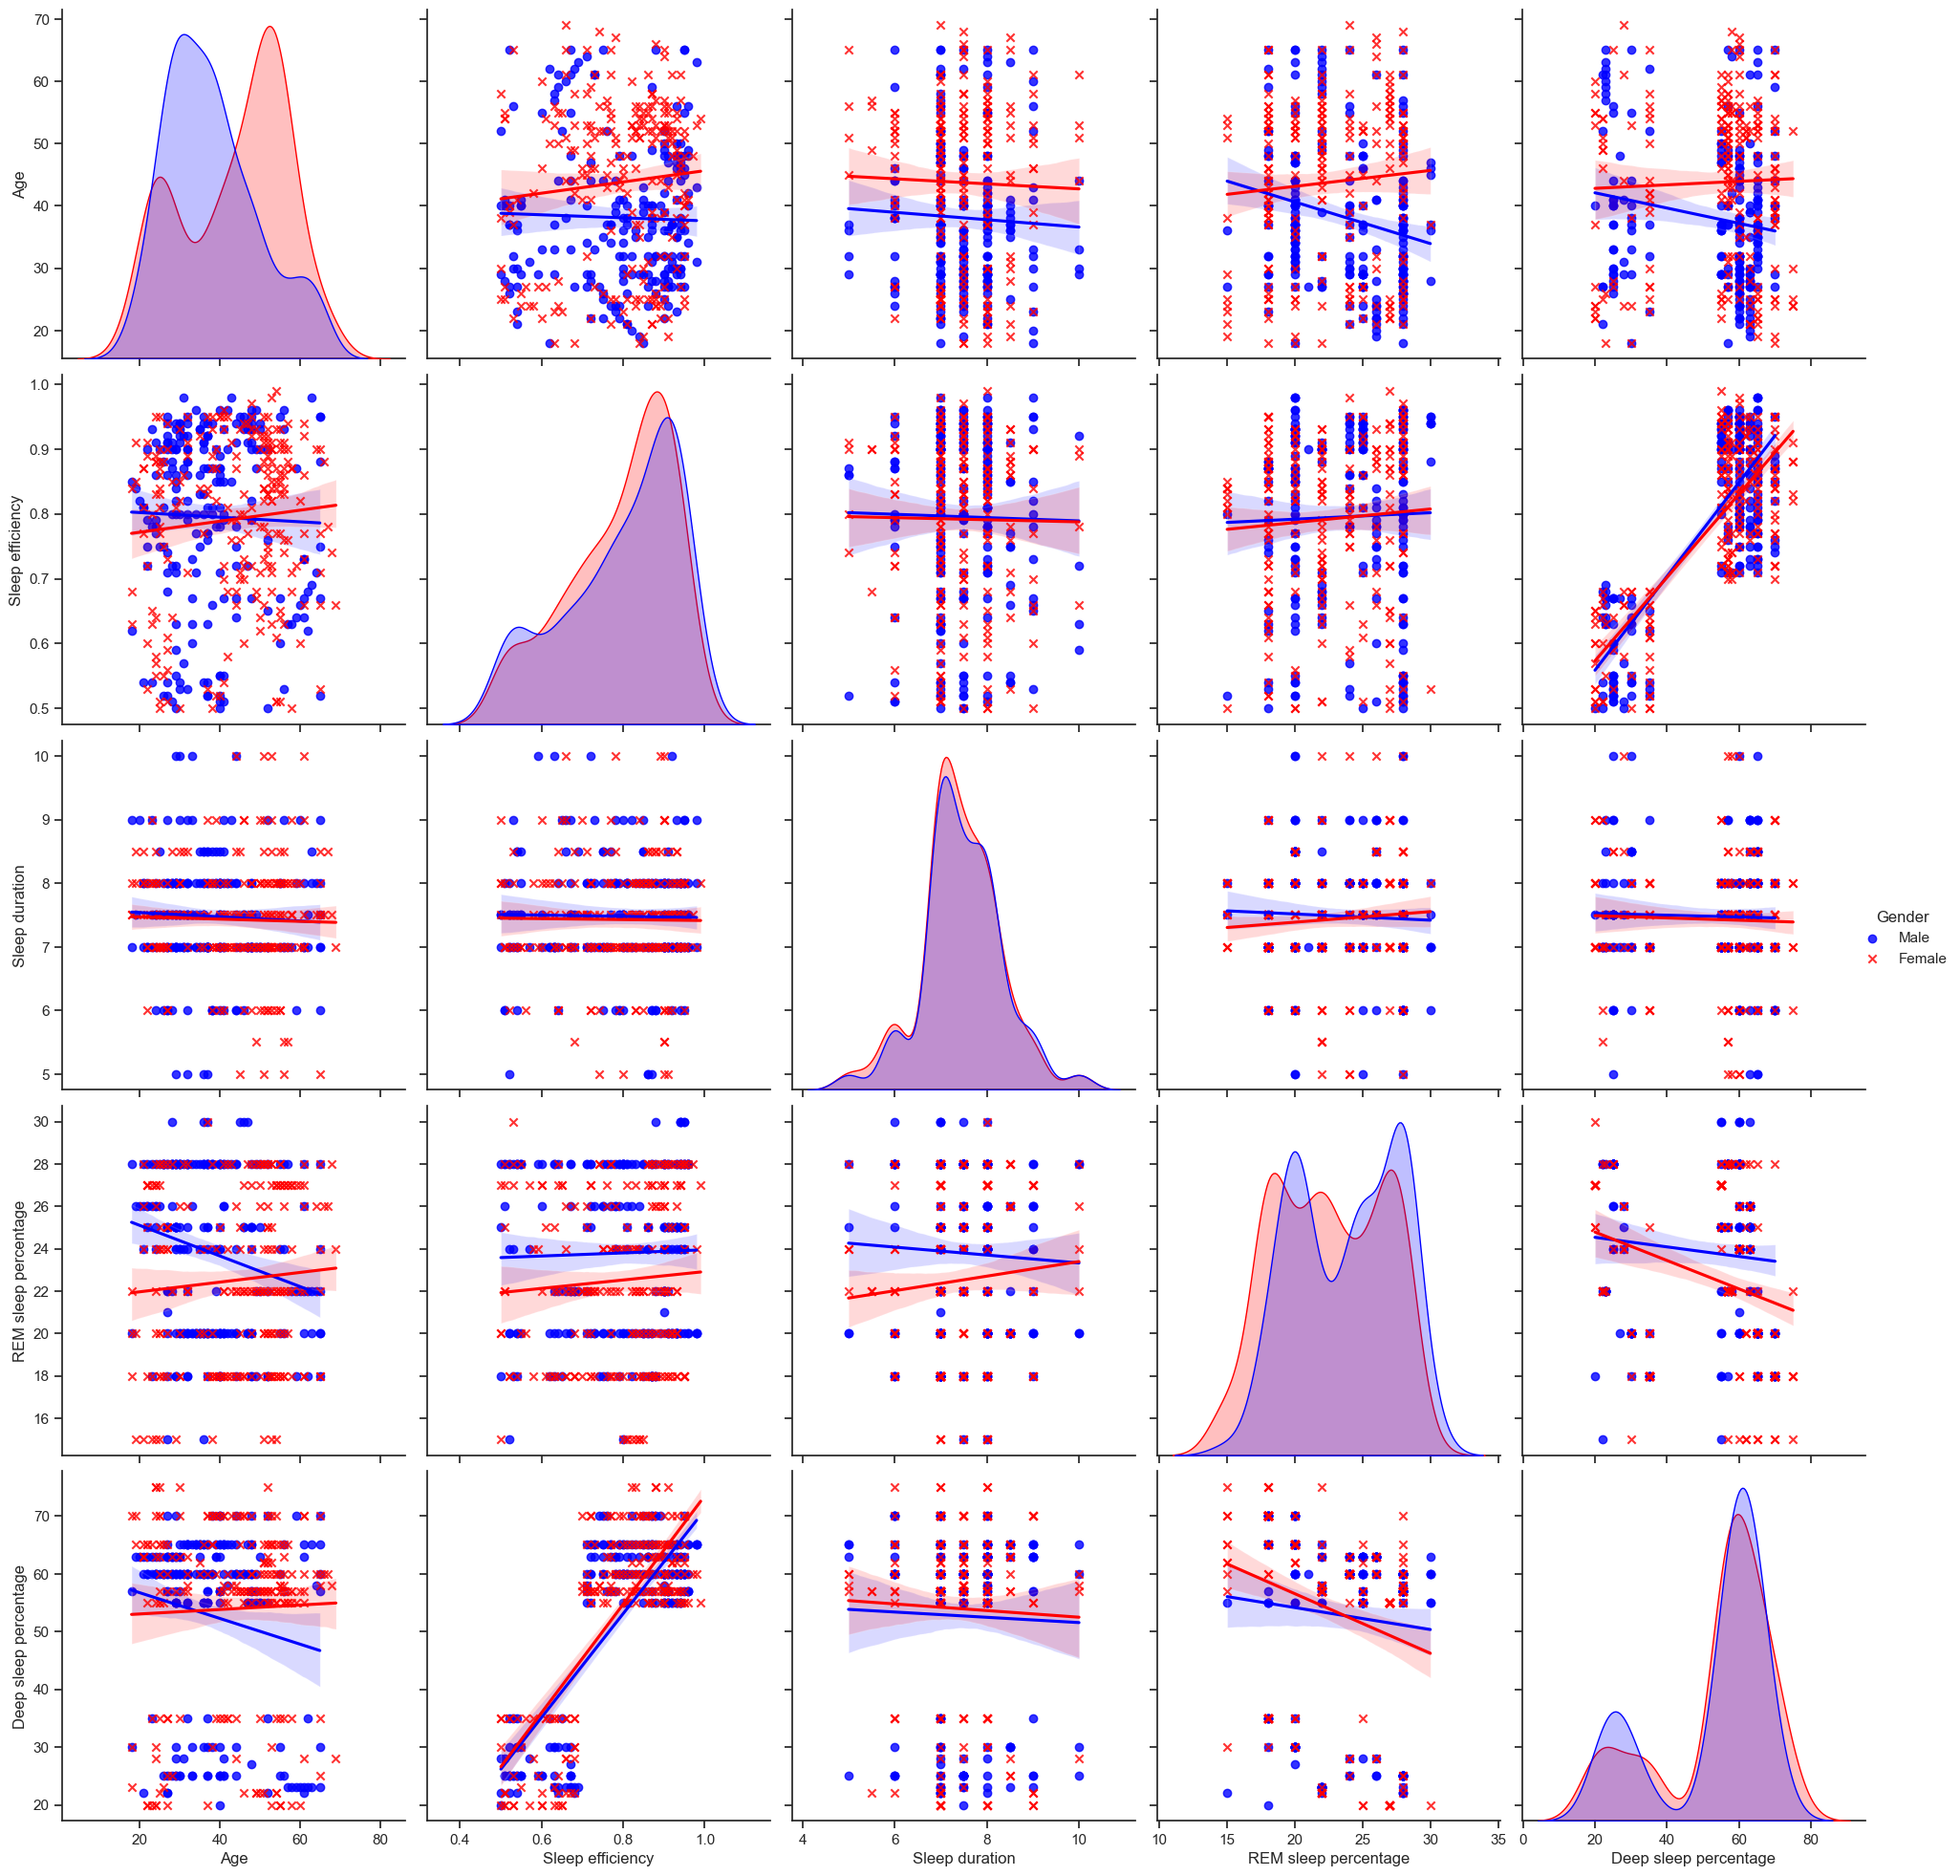

In [122]:
sns.set(style="ticks")
plot = sns.pairplot(data[['Gender', 'Age', 'Sleep efficiency','Sleep duration', 'REM sleep percentage', 'Deep sleep percentage']],height=4, kind='reg', hue='Gender', diag_kind='kde', markers=["o", "x"],
palette = custom_palette)

plot._legend.set_title('Gender')
legend_labels = {0: 'Male', 1: 'Female'}
for t, l in zip(plot._legend.texts, legend_labels.values()):
    t.set_text(l)
plt.show()

We are doing the same pairplot with *Age* and *Gender* but against the negative sleep indicators.

We can observe that the number of awakenings is not affected with the age increase. 

Also light sleep has a positive correlation with the number of awakenings. It means that if the number of awakenings is increasing the light sleep percentage is also increasing.

We can observe that both *Awakenings* and *Light sleep percentage* is affecting negatively *Sleep efficiency*.

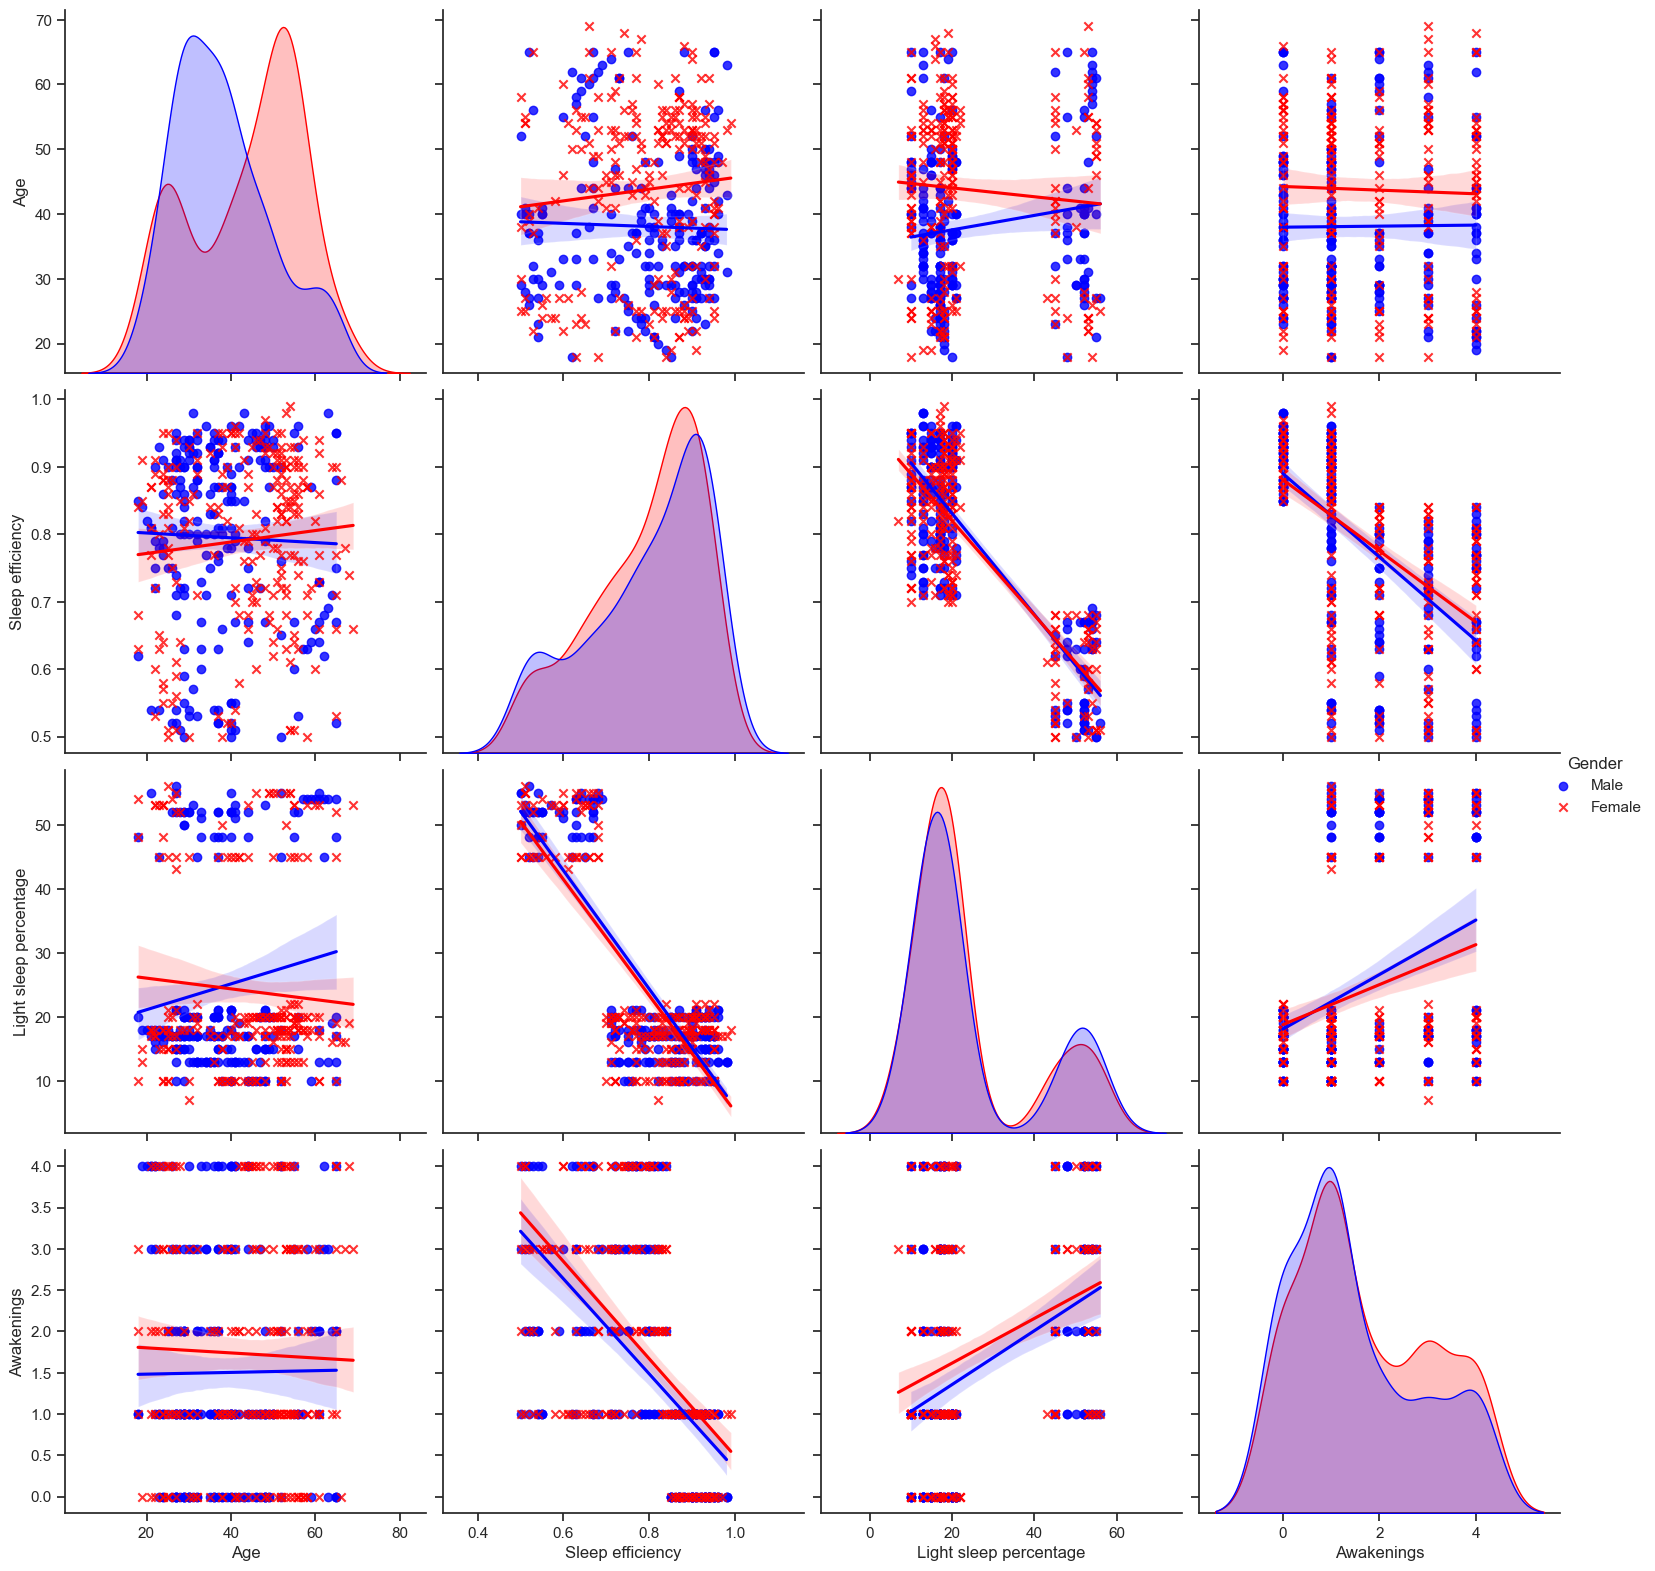

In [123]:
sns.set(style="ticks")
plot = sns.pairplot(data[['Gender', 'Age', 'Sleep efficiency','Light sleep percentage', 'Awakenings']],height=4, kind='reg', hue='Gender', diag_kind='kde', markers=["o", "x"],
palette = custom_palette)

plot._legend.set_title('Gender')
legend_labels = {0: 'Male', 1: 'Female'}
for t, l in zip(plot._legend.texts, legend_labels.values()):
    t.set_text(l)
plt.show()

### Boxplots

We can check also if the lifestyle features are affecting the sleep patterns.

It seems that non-smokers are having a better sleep efficiency.

<Axes: xlabel='Smoking status', ylabel='Sleep efficiency'>

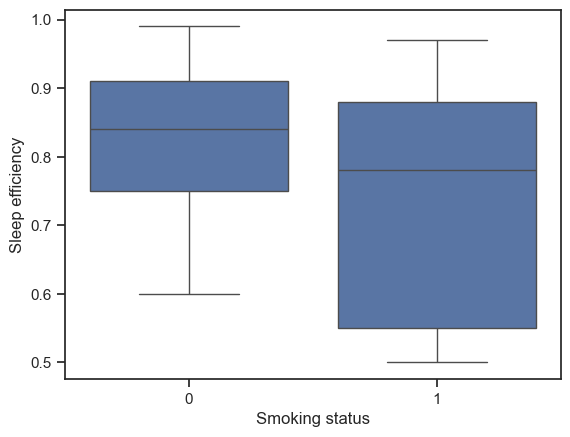

In [124]:
sns.boxplot(data=data, x="Smoking status", y="Sleep efficiency")

The general trend of alcohol consumption it seems that the sleep efficiency is decreasing when more alcohol in consumed.

<Axes: xlabel='Alcohol consumption', ylabel='Sleep efficiency'>

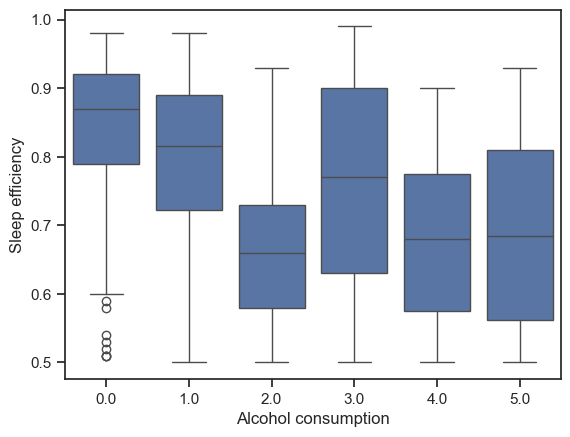

In [125]:
sns.boxplot(data=data, x="Alcohol consumption", y="Sleep efficiency")

Exercise frequency is a factor that improves the sleep efficiency.

<Axes: xlabel='Exercise frequency', ylabel='Sleep efficiency'>

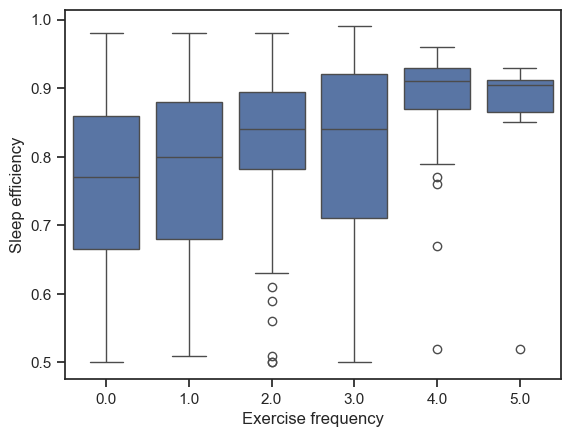

In [126]:
sns.boxplot(data=data, x='Exercise frequency', y='Sleep efficiency')

<Axes: xlabel='Awakenings', ylabel='Sleep efficiency'>

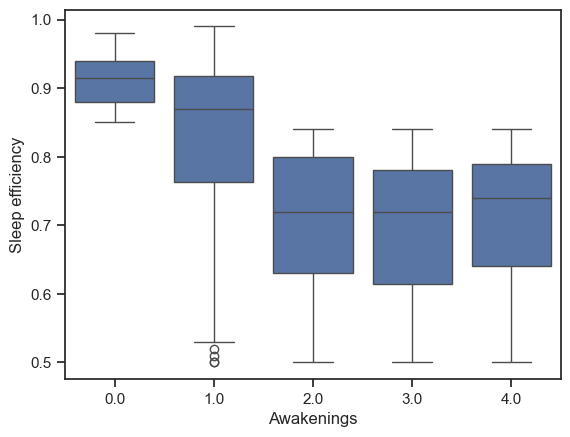

In [127]:
sns.boxplot(data=data, x="Awakenings", y="Sleep efficiency")

# Feature engineering

### Remove columns

We can remove **ID** column because it does not help us, it has unique values.

In [128]:
print(data["ID"].nunique() == len(data))
data.drop("ID", axis=1,inplace=True)
data.columns

True


Index(['Age', 'Gender', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
       'Bedtime_hour', 'IsWinter', 'IsWeekend'],
      dtype='object')

### Predict missing values from ***Awakenings***

To do this we need to split the actual data into:
- ***train*** data: the rows that are having values for *Awakenings*, which we will use to train our model
- ***test*** data: the rows that do not have values for *Awakenings*, which we will use to predict the values on the trained model

In [129]:
train_data = data[data.isnull().any(axis=1) < 1]

print(train_data.isna().sum())

train_data.shape

Age                       0
Gender                    0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
Bedtime_hour              0
IsWinter                  0
IsWeekend                 0
dtype: int64


(417, 15)

In [130]:
test_data = data[data.isnull().any(axis=1) >= 1]

test_data.isna().sum()

test_data.shape

(19, 15)

Then we need to split our training data into:
- ***features***: the columns from our dataset without the *Awakenings* column
- ***target***: only the *Awakenings* column

In [131]:
x_train = train_data.drop('Awakenings', axis=1) #features
y_train = train_data[['Awakenings']] #target

For the test data we need to extract only the columns without the *Awakenings* column.

The ***target*** will be the predicted values from the model.

In [132]:
x_test = test_data.drop('Awakenings', axis=1) #features

In order to be able to make a prediction using our data we will need to:
- scale our data
- train a model with our train data
- predict values with our trained model

In [133]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# we will normalize the data with MinMaxScaler
scalar = MinMaxScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)

# we are splitting x_train and y_train into train and validation data for our model
X_train_splitted, X_validation_splitted, Y_train_splitted, Y_validation_splitted = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=50)

rf_model = RandomForestClassifier(
                                  n_estimators=1000,
                                  max_depth=20, 
                                  min_samples_split=2, 
                                  random_state=50
                                  )
#we are training the model
Y_train_splitted = np.ravel(Y_train_splitted)
rf_model.fit(X_train_splitted, Y_train_splitted)

# we are using the model to predict the target values from x_train
y_pred_rf = rf_model.predict(X_validation_splitted)

#we are checking the accuracy of our model based on the values from y_train
accuracy = accuracy_score(Y_validation_splitted, y_pred_rf)

print(accuracy)

# we are using the model to predict the values from x_train
target_values = rf_model.predict(x_test_scaled)

print (target_values)

(333, 1)
(333,)
0.40476190476190477
[1. 1. 0. 4. 1. 1. 2. 1. 1. 3. 2. 1. 2. 1. 4. 4. 1. 1. 1.]


After we predicted our values, we need to replace the null values our original dataset

In [52]:
null_awakenings = data['Awakenings'].isna()

data.loc[null_awakenings, 'Awakenings'] = target_values

data['Awakenings'].isnull().sum()

0

### Handling outliers

#### Visualization of outliers

We can create boxplots for every feature and see if there are any outliers

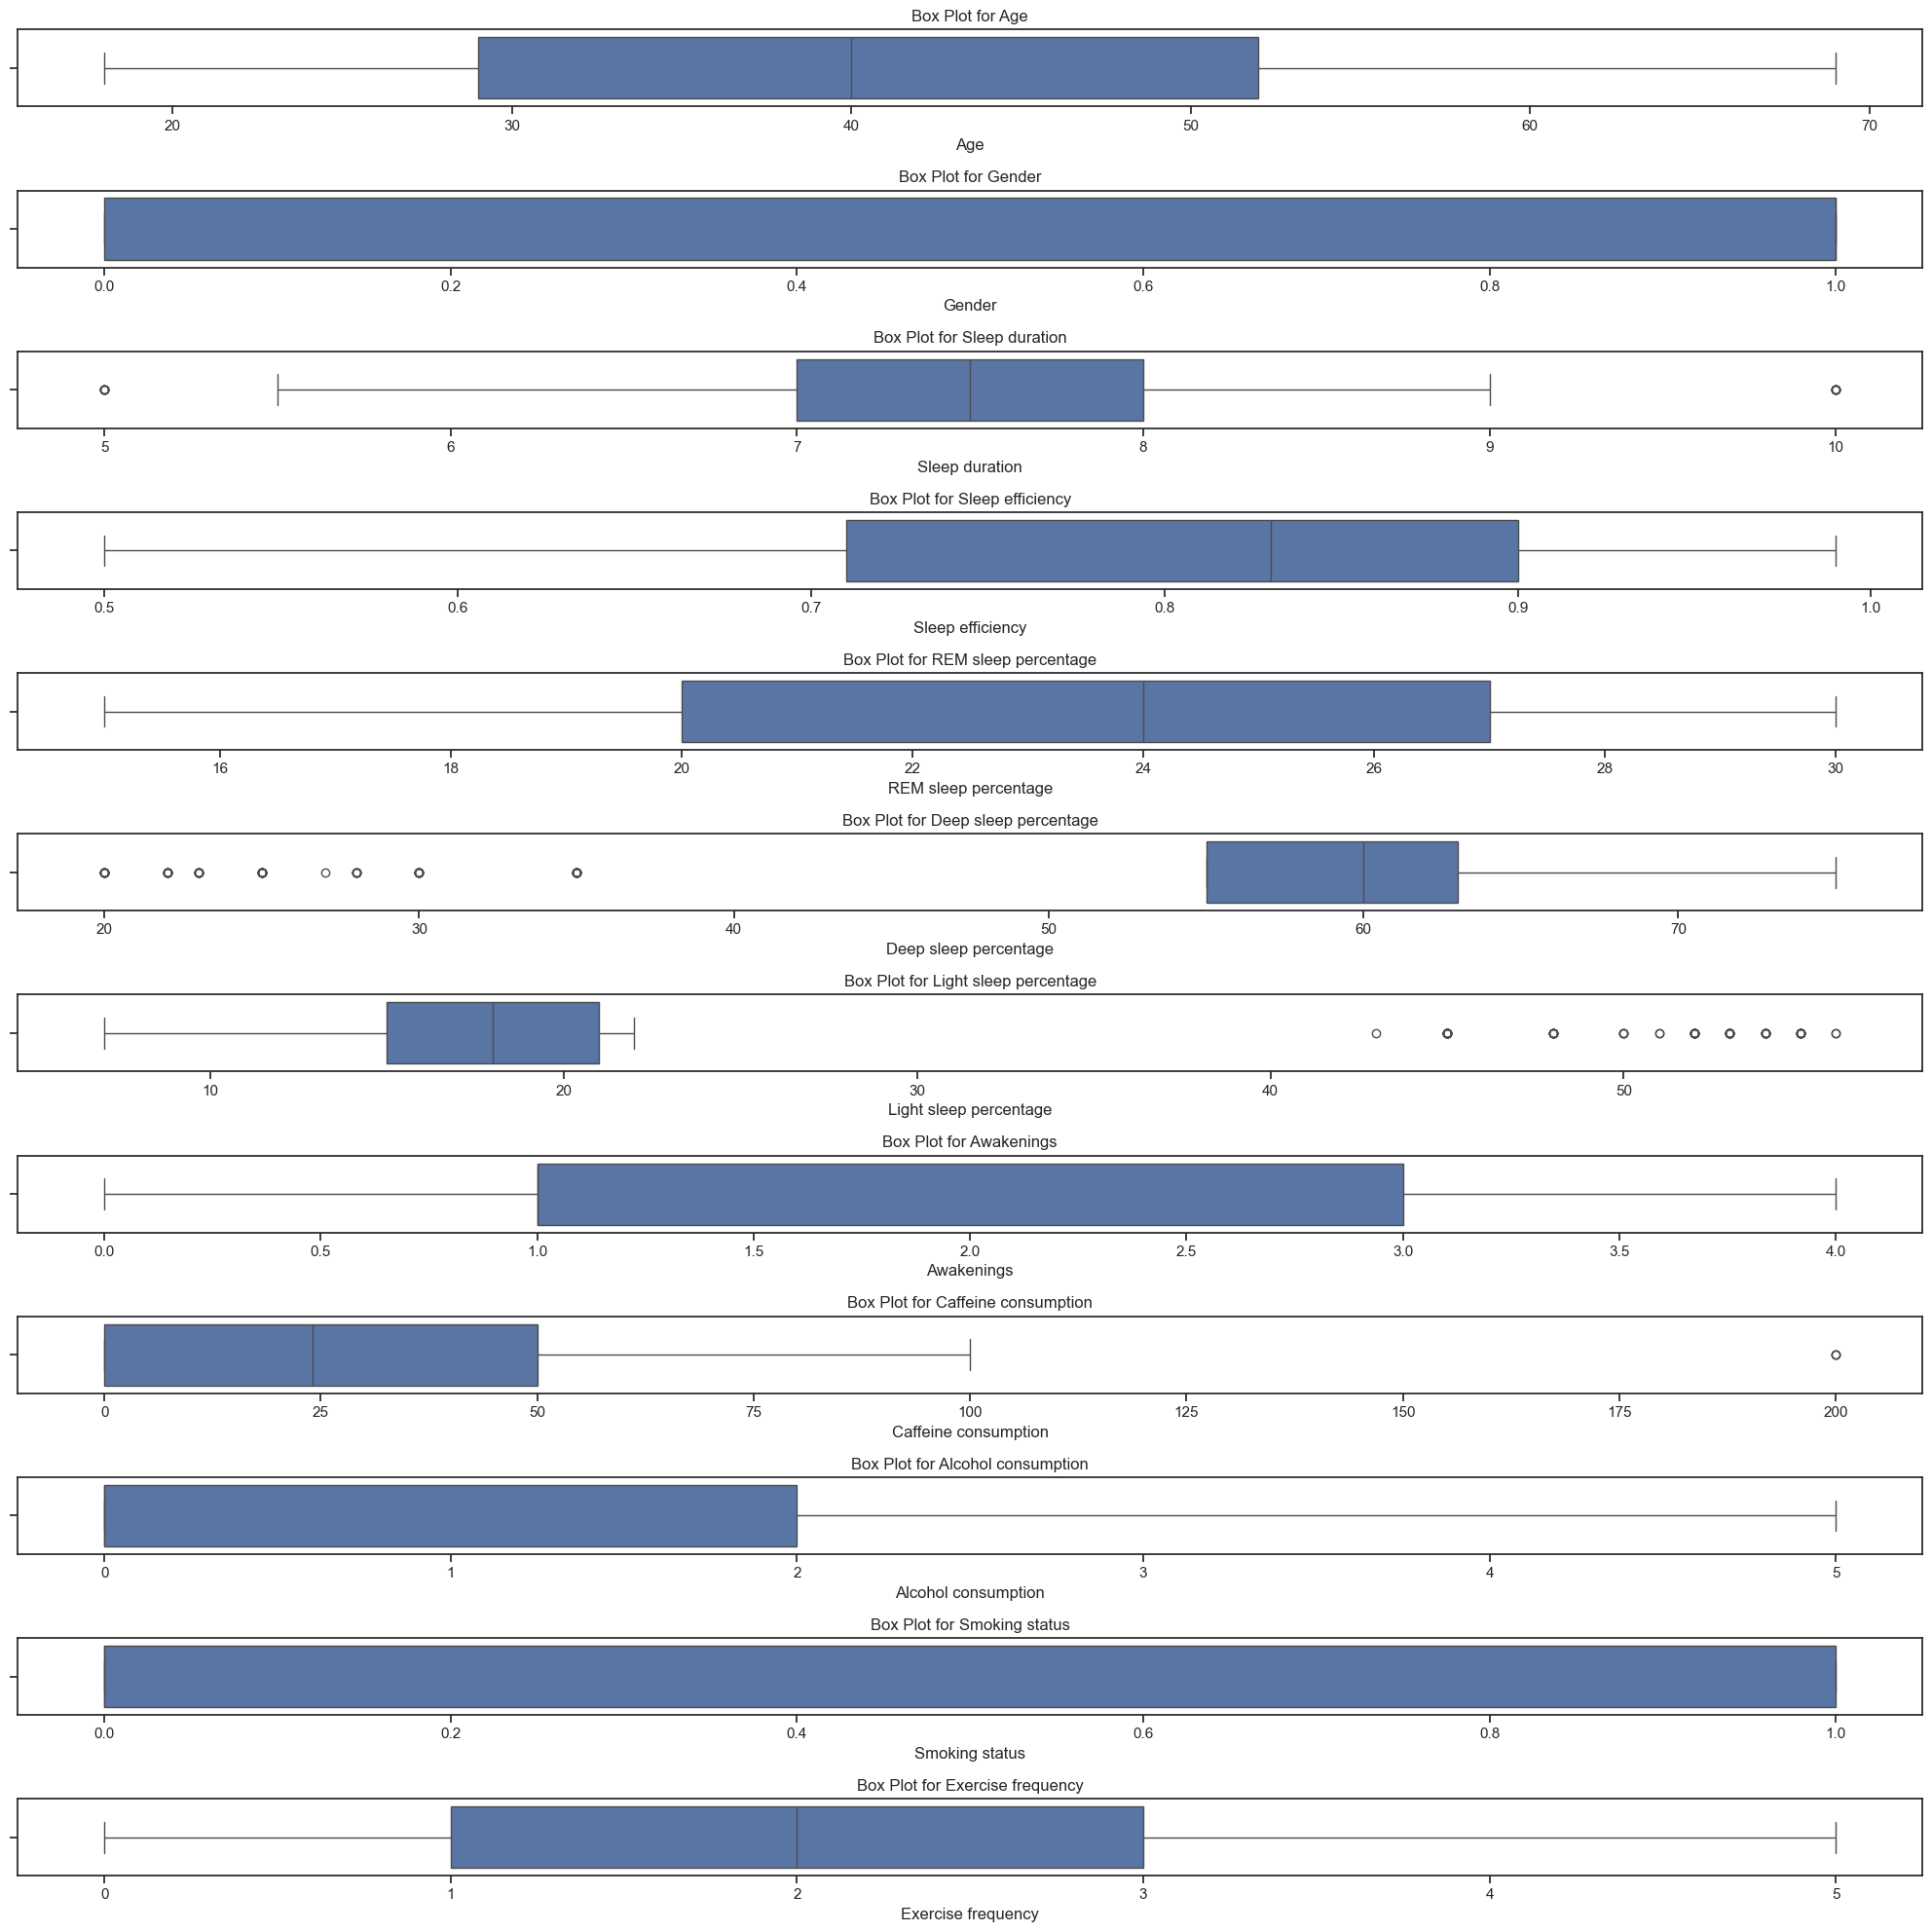

In [53]:
import matplotlib.pyplot as plt

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20,20))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i+1)
    sns.boxplot(data[feature], orient='h')
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)
    
plt.tight_layout()
plt.show()

#### Replace outliers with less extreme values

In ***Caffeine consumption*** we can see that are outliers and we should decide what we could do with them.

Instead of removing them we can replace the values from the outliers with a less extreme value. We chose to replace them with the upper bound value.

Because there are no outliers in the lower bound, even though we wrote code to replace them, no values will be changed at the lower bound.

In [54]:
# Specify the column for which you want to handle outliers
column_name = 'Caffeine consumption'

# Calculate the Interquartile Range (IQR)
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers with bounds
outliers_lower = data[column_name] < lower_bound
outliers_upper = data[column_name] > upper_bound

# Replace outliers
data.loc[outliers_lower, column_name] = lower_bound
data.loc[outliers_upper, column_name] = upper_bound

data['Caffeine consumption'].value_counts()


Caffeine consumption
0.0      201
50.0     105
25.0      78
24.0      24
75.0      24
125.0      3
100.0      1
Name: count, dtype: int64

#### Removing outliers from multiple columns

We are looking at outliers on *Deep sleep percentage* and *Light sleep percentage*.

We are first defining some tresholds based on percentiles and we are checking if the rows with outliers from these two features are matching.

In [55]:
 #Step 1: Define the lower and upper bounds for outliers based on percentiles
lower_percentile = 5  # Adjust as needed
upper_percentile = 95  # Adjust as needed
deep_sleep_feature = 'Deep sleep percentage'

deep_lower_bound = data[deep_sleep_feature].quantile(lower_percentile / 100)
deep_upper_bound = data[deep_sleep_feature].quantile(upper_percentile / 100)

# Step 2: Identify outliers
outliers_deep_sleep = data[(data[deep_sleep_feature] < deep_lower_bound) | (data[deep_sleep_feature] > deep_upper_bound)]

# Step 3: Display the outliers
print(outliers_deep_sleep[deep_sleep_feature].value_counts())


print(data[deep_sleep_feature].loc[outliers_deep_sleep.index])

Deep sleep percentage
20    13
75     5
Name: count, dtype: int64
17     20
20     75
24     75
25     75
28     20
30     20
106    20
115    20
172    20
231    20
272    20
299    20
320    20
347    75
350    20
364    20
378    75
420    20
Name: Deep sleep percentage, dtype: int64


We can see that only a few outliers from these two feature are matching so we do not remove them.

In [56]:
 #Step 1: Define the lower and upper bounds for outliers based on percentiles
lower_percentile = 5  # Adjust as needed
upper_percentile = 95  # Adjust as needed
light_sleep_feature = 'Light sleep percentage'

light_lower_bound = data[light_sleep_feature].quantile(lower_percentile / 100)
light_upper_bound = data[light_sleep_feature].quantile(upper_percentile / 100)

# Step 2: Identify outliers
outliers_light_sleep = data[(data[light_sleep_feature] < light_lower_bound) | (data[light_sleep_feature] > light_upper_bound)]

# Step 3: Display the outliers
print(outliers_light_sleep[light_sleep_feature].value_counts())

print(data[light_sleep_feature].loc[outliers_light_sleep.index])


Light sleep percentage
55    14
56     2
7      1
Name: count, dtype: int64
16     55
17     55
35     55
84     55
106    55
126    55
172    55
257    56
314    55
325    55
330    55
345    56
347     7
415    55
418    55
441    55
442    55
Name: Light sleep percentage, dtype: int64


We will remove the ones that are matching in both features.

In [57]:
#we are looking for common rows in both outliers
common_indexes = set(outliers_light_sleep.index.tolist()).intersection(outliers_deep_sleep.index.tolist())
print(common_indexes)


print(data.shape)
#we are dropping those values
data.drop(index=common_indexes, inplace=True)

data.shape

{17, 106, 347, 172}
(436, 15)


(432, 15)

#### Outliers transformation

We can use some transformation techniques like square root or log transform in order to compress the data and reduce the effect of the outliers.

In [58]:
#square root
data['Light sleep percentage'] = np.sqrt(data['Light sleep percentage'])
outliers_light_sleep = data[(data['Light sleep percentage'] < light_lower_bound) | (data['Light sleep percentage'] > light_upper_bound)]
print(data['Light sleep percentage'].loc[outliers_light_sleep.index])


0      3.162278
1      7.280110
2      3.162278
3      7.211103
4      4.242641
         ...   
447    4.582576
448    4.582576
449    6.928203
450    3.162278
451    7.348469
Name: Light sleep percentage, Length: 432, dtype: float64


In [59]:
#log transform
data['Deep sleep percentage'] = np.log1p(data['Deep sleep percentage'])
outliers_deep_sleep = data[(data['Deep sleep percentage'] < deep_lower_bound) | (data['Deep sleep percentage'] > deep_upper_bound)]

print(data['Deep sleep percentage'].loc[outliers_deep_sleep.index])

data.head()

0      4.262680
1      3.367296
2      4.262680
3      3.258097
4      4.025352
         ...   
447    4.060443
448    4.060443
449    3.433987
450    4.262680
451    3.178054
Name: Deep sleep percentage, Length: 432, dtype: float64


,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_hour,IsWinter,IsWeekend
0,65,0,6.0,0.88,18,4.262680,3.162278,0.0,0.0,0.0,1,3.0,1,0,1
1,69,1,7.0,0.66,24,3.367296,7.280110,3.0,0.0,3.0,1,3.0,2,1,1
2,40,0,8.0,0.89,20,4.262680,3.162278,1.0,0.0,0.0,0,3.0,21,0,0
3,40,0,6.0,0.51,28,3.258097,7.211103,3.0,50.0,5.0,1,1.0,2,0,0
4,57,1,8.0,0.76,27,4.025352,4.242641,3.0,0.0,3.0,0,3.0,1,0,1


#### Winsorizing

In [60]:
sleep_duration_column_name = 'Sleep duration'

lower_bound = data[sleep_duration_column_name].quantile(lower_percentile / 100)
upper_bound = data[sleep_duration_column_name].quantile(upper_percentile / 100)

print(lower_bound)
print(upper_bound)

outliers_sleep_duration = data[(data[sleep_duration_column_name] < lower_bound) | (data[sleep_duration_column_name] > upper_bound)]

print(outliers_sleep_duration[sleep_duration_column_name].value_counts())

6.0
9.0
Sleep duration
10.0    8
5.0     8
5.5     3
Name: count, dtype: int64


For the *Sleep duration* outliers we can use a *winsorizing* technique.

Winsorizing:
Replace extreme values with values close to them but not as extreme.
Winsorizing involves replacing values below a certain percentile with the value at that percentile and values above a certain percentile with the value at that percentile.

In [61]:
from scipy.stats.mstats import winsorize

# Specify the percentage to winsorize at both ends
data[sleep_duration_column_name] = winsorize(data[sleep_duration_column_name], limits=[0.05, 0.05])

data[sleep_duration_column_name].value_counts()


Sleep duration
7.0    148
8.0     96
7.5     87
6.0     44
9.0     31
8.5     26
Name: count, dtype: int64

### Dimensionality reduction

In [62]:
data.columns

Index(['Age', 'Gender', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
       'Bedtime_hour', 'IsWinter', 'IsWeekend'],
      dtype='object')

We can do this by using PCA technique. We can try this on all kind of features from our dataset. And when we might use this while training the model when trying to improve the performance.

[[-2.00637292  1.32305972  1.33027793  1.13050772]
 [ 2.66083953  0.50913955  0.49354721  0.03108011]
 [-1.59345128  0.13452782 -0.92213063  0.15918882]
 ...
 [ 1.75117619 -0.28929082 -1.40799527  1.48376249]
 [-1.19331744  1.81542132 -0.23957752 -0.69967766]
 [ 2.46224719 -0.12913639 -0.01280815  1.57295177]]


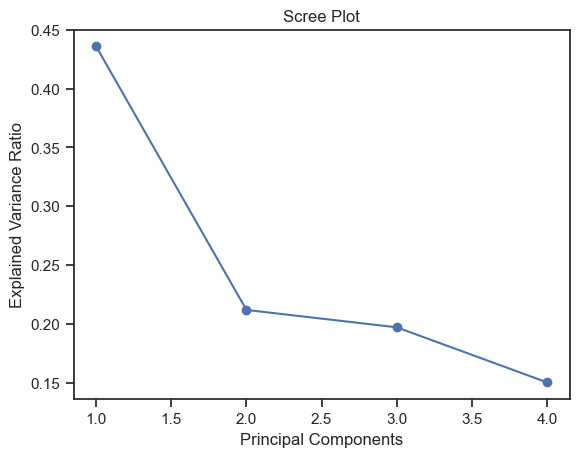

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the specified columns
selected_columns = ['Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings']
df_selected = data[selected_columns]

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_selected)

# Apply PCA
pca = PCA(0.9)
pca_result = pca.fit_transform(df_standardized)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

print(pca_result)

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

### Drop columns for model training


We can look again at the correlation heatmap between the sleep indicators.

<Axes: >

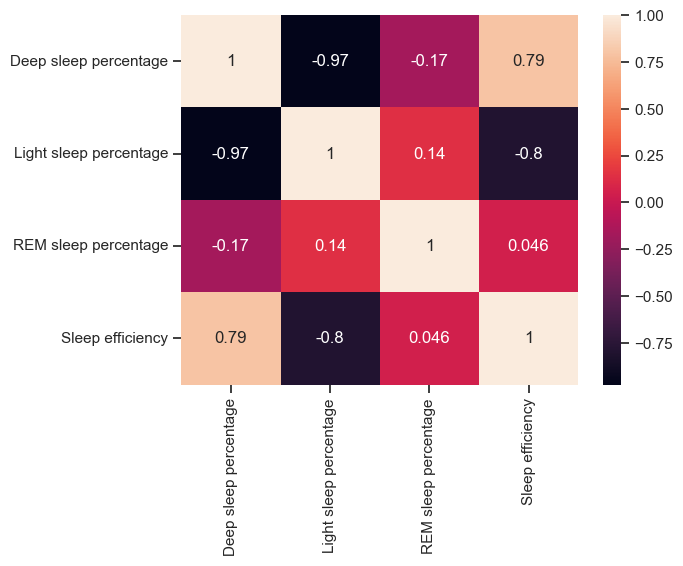

In [64]:
corr_columns = ['Deep sleep percentage', 'Light sleep percentage', 'REM sleep percentage', 'Sleep efficiency']

corr_matrix = data[corr_columns].corr()

sns.heatmap(corr_matrix, annot=True)

Since the correlation between *Deep sleep percentage* and *Light sleep percentage* is a strong negative correlation, we can remove *Light sleep percentage*
We can also remove the column *IsWeekend* and *IsWinter* because they do not seem to influence our dataset.

In [65]:
data.drop(['IsWinter', 'IsWeekend', 'Light sleep percentage'], axis=1, inplace=True)

data.columns

Index(['Age', 'Gender', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage', 'Awakenings',
       'Caffeine consumption', 'Alcohol consumption', 'Smoking status',
       'Exercise frequency', 'Bedtime_hour'],
      dtype='object')

# Sleep efficiency model

From the EDA process we observe that the target variable is the *Sleep efficiency*  which is a continuous numerical value.

This means that we need to resolve a regression problem.

#### Splitting train/test data

First we need to split our dataset into train and test data

First we need to normalize the data from our dataset
X_train_splitted, X_validation_splitted, Y_train_splitted, Y_validation_splitted = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=50)

In [66]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print(train_data.shape)
print(test_data.shape)

(345, 12)
(87, 12)


> Training data

Then we need to extract the target and feature for training in two separate variables

In [67]:
x_train_data = train_data.drop('Sleep efficiency', axis=1)
y_train_data = train_data[['Sleep efficiency']]

y_train_data.columns

Index(['Sleep efficiency'], dtype='object')

> Test data

We need to do the same thing for test data.

In [68]:
x_test_data = test_data.drop('Sleep efficiency', axis=1)
y_test_data = test_data[['Sleep efficiency']]

y_test_data.columns

Index(['Sleep efficiency'], dtype='object')

#### Scale data

Then we need to scale our features from *x_train* and *x_test*

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_data), columns=x_train_data.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test_data), columns=x_test_data.columns)

x_test_scaled.head()

,Age,Gender,Sleep duration,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_hour
0,0.921569,0.0,0.500000,0.466667,0.103818,1.00,0.666667,0.4,0.0,0.0,0.086957
1,0.215686,1.0,0.500000,0.000000,0.789855,0.50,1.666667,0.0,0.0,0.4,0.913043
2,0.686275,1.0,0.500000,0.200000,0.302800,1.00,0.666667,0.8,0.0,0.4,0.000000
3,0.156863,1.0,0.333333,0.866667,0.103818,0.75,0.000000,0.8,1.0,0.0,0.000000
4,0.686275,1.0,0.333333,0.333333,0.947090,0.75,0.000000,0.0,0.0,0.4,0.000000


### Linear regression model

First we will try with *Linear regression model* which is the simplest model that we can use.

#### Train the model and predict

We will train the model with our data then we will predict the target values.

Also we will use some metric to see how the model is behaving.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create model
linear_model = LinearRegression()

# train model
linear_model.fit(x_train_scaled, y_train_data)

# use model to predict target values
y_pred = linear_model.predict(x_test_scaled)

mse = mean_squared_error(y_test_data, y_pred)
print("Mean Squared Error:", mse, "- lower is better")

mae = mean_absolute_error(y_test_data, y_pred)
print("Mean Absolute Error:", mae, "- lower is better" )

r2 = r2_score(y_test_data, y_pred)
print("R Squared Error:", r2, "- higher is better")


Mean Squared Error: 0.002640543970551236 - lower is better
Mean Absolute Error: 0.03963924774529282 - lower is better
R Squared Error: 0.8436042872997558 - higher is better


#### Plot actual vs predicted

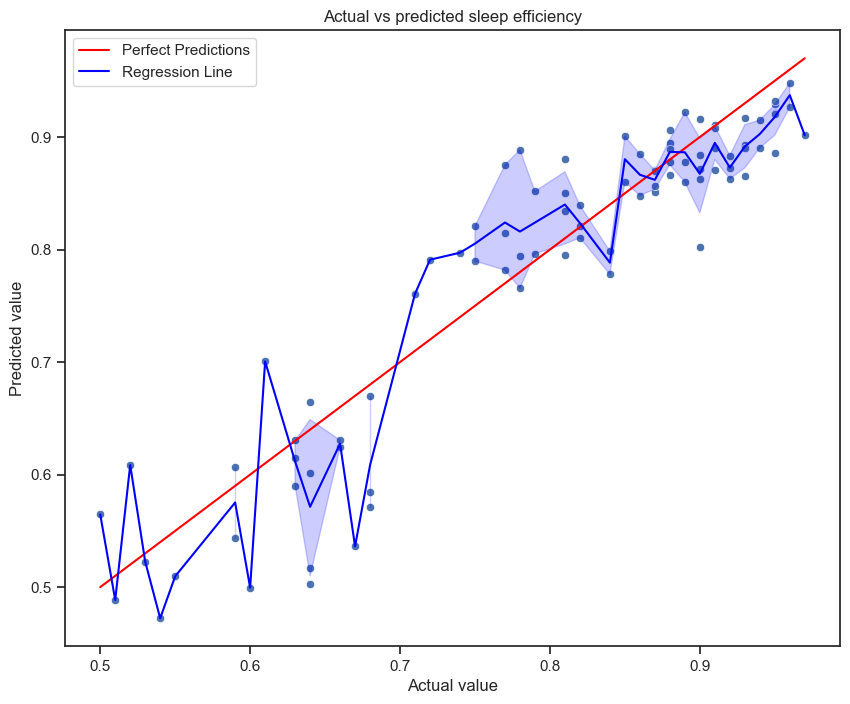

In [71]:
plt.figure(figsize=(10,8))

sns.scatterplot(x=y_test_data['Sleep efficiency'].values, y=y_pred.ravel())
plt.title('Actual vs predicted sleep efficiency')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# Plot the regression line
sns.lineplot(x=y_test_data['Sleep efficiency'], y=y_test_data['Sleep efficiency'], color='red', label='Perfect Predictions')
sns.lineplot(x=y_test_data['Sleep efficiency'], y=y_pred.ravel(), color='blue', label='Regression Line')
plt.legend()
#plt.axis([0.5, 0.99, 0.5, 0.99])
plt.show()



#### Residual plot for MAE

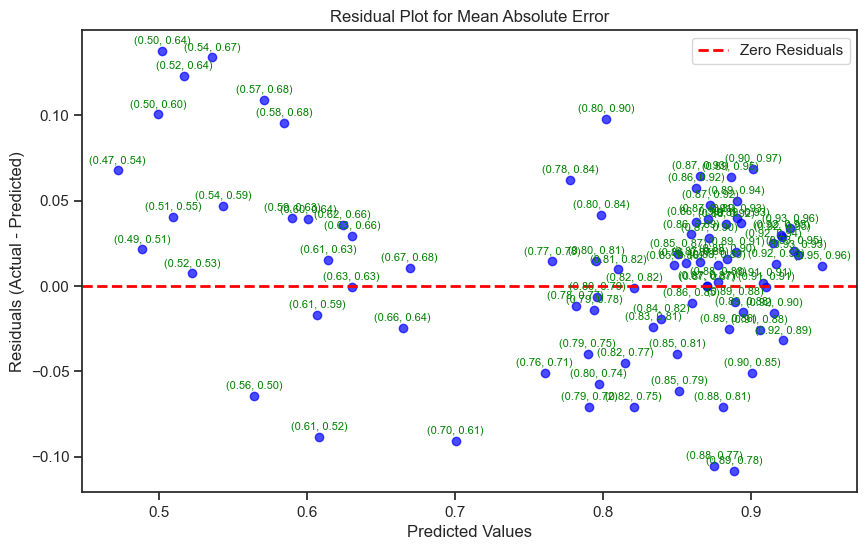

In [72]:
residuals = y_test_data - y_pred
residuals = list(residuals['Sleep efficiency'])

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7, )

#y_pred = y_pred.ravel()
for i, (pred, actual) in enumerate(zip(list(y_pred.ravel()), list(y_test_data['Sleep efficiency']))):
    plt.annotate(f'({pred:.2f}, {actual:.2f})', (y_pred[i], residuals[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='green')

plt.title('Residual Plot for Mean Absolute Error')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.legend()
plt.show()


In [73]:
actual = y_test_data['Sleep efficiency']
predicted = np.round(y_pred.ravel(), 3)

actual_vs_predicted = list(zip(actual, predicted))

print(actual_vs_predicted)

[(0.67, 0.536), (0.81, 0.795), (0.68, 0.571), (0.55, 0.51), (0.82, 0.839), (0.81, 0.85), (0.9, 0.884), (0.9, 0.802), (0.79, 0.852), (0.93, 0.917), (0.72, 0.791), (0.94, 0.915), (0.77, 0.875), (0.84, 0.778), (0.59, 0.607), (0.91, 0.89), (0.92, 0.872), (0.79, 0.796), (0.92, 0.863), (0.89, 0.922), (0.93, 0.866), (0.82, 0.81), (0.53, 0.523), (0.95, 0.886), (0.95, 0.921), (0.86, 0.848), (0.85, 0.901), (0.68, 0.67), (0.78, 0.888), (0.85, 0.86), (0.59, 0.543), (0.66, 0.624), (0.87, 0.87), (0.77, 0.815), (0.91, 0.91), (0.78, 0.794), (0.52, 0.609), (0.75, 0.821), (0.89, 0.878), (0.74, 0.797), (0.87, 0.87), (0.9, 0.872), (0.64, 0.503), (0.77, 0.782), (0.87, 0.851), (0.63, 0.615), (0.51, 0.489), (0.88, 0.906), (0.61, 0.701), (0.64, 0.601), (0.54, 0.472), (0.63, 0.63), (0.66, 0.631), (0.88, 0.895), (0.71, 0.761), (0.93, 0.893), (0.6, 0.5), (0.91, 0.908), (0.88, 0.866), (0.97, 0.902), (0.87, 0.856), (0.75, 0.79), (0.88, 0.889), (0.96, 0.926), (0.9, 0.863), (0.84, 0.799), (0.63, 0.59), (0.91, 0.871)

#### Equation for the regression problem

In [74]:
coefficients = linear_model.coef_.ravel()
intercept = linear_model.intercept_

equation = f'Y = {np.round(intercept,4)} + {np.round(coefficients[0],4)} * X1'
for i in range(1, len(coefficients)):
    equation += f' + {np.round(coefficients[i], 4)} * X{i + 1}'

print('Equation:', equation)
print('Intercept:', intercept)
print('Coefficients:', coefficients)


Equation: Y = [0.5725] + 0.0386 * X1 + 0.0033 * X2 + 0.0134 * X3 + 0.0699 * X4 + 0.3163 * X5 + -0.1342 * X6 + 0.0056 * X7 + -0.0344 * X8 + -0.0421 * X9 + 0.0255 * X10 + 0.0024 * X11
Intercept: [0.57251387]
Coefficients: [ 0.03857502  0.00332293  0.01344155  0.0699227   0.31631773 -0.13417897
  0.00555119 -0.03435785 -0.0420705   0.02547506  0.00244504]


### Random forest regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(max_depth=20, n_estimators=100, random_state=42, max_features=4)

#reshaped y_train to be unidimensional
y_train_data = np.ravel(y_train_data)

forest_model.fit(x_train_scaled, y_train_data)

forest_y_pred = forest_model.predict(x_test_scaled)

mse = mean_squared_error(y_test_data, forest_y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test_data, forest_y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test_data, forest_y_pred)
print("R Squared Error:", r2)


Mean Squared Error: 0.0015944986206896578
Mean Absolute Error: 0.031691954022988494
R Squared Error: 0.9055600849811803


#### Feature importance in model

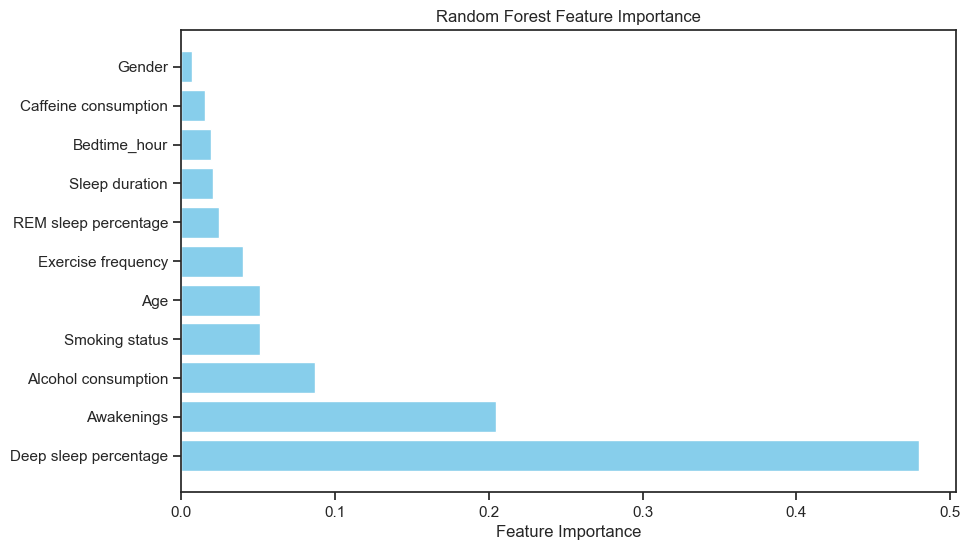

In [76]:
feature_importances = forest_model.feature_importances_

feature_importance_dict = dict(zip(x_train_data.columns, feature_importances))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)   # Sort features by importance in descending order
features, importance = zip(*sorted_features)                                                  # Extract feature names and importance scores

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

#### Plot actual vs predicted

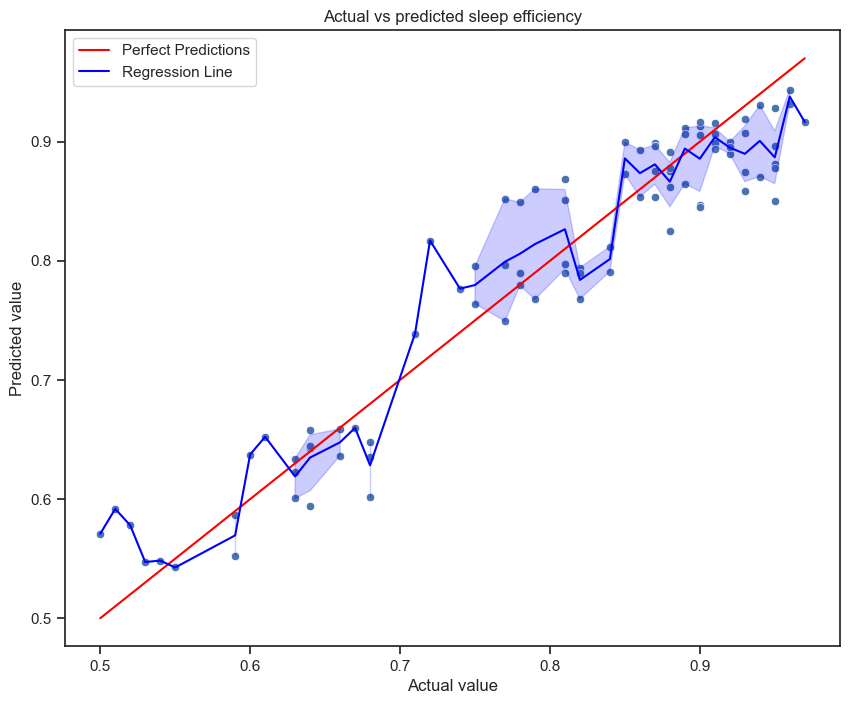

In [77]:
plt.figure(figsize=(10,8))

sns.scatterplot(x=y_test_data['Sleep efficiency'].values, y=forest_y_pred.ravel())
plt.title('Actual vs predicted sleep efficiency')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# Plot the regression line
sns.lineplot(x=y_test_data['Sleep efficiency'], y=y_test_data['Sleep efficiency'], color='red', label='Perfect Predictions')
sns.lineplot(x=y_test_data['Sleep efficiency'], y=forest_y_pred.ravel(), color='blue', label='Regression Line')
plt.legend()
#plt.axis([0.5, 0.99, 0.5, 0.99])
plt.show()

#### Decision tree visualization

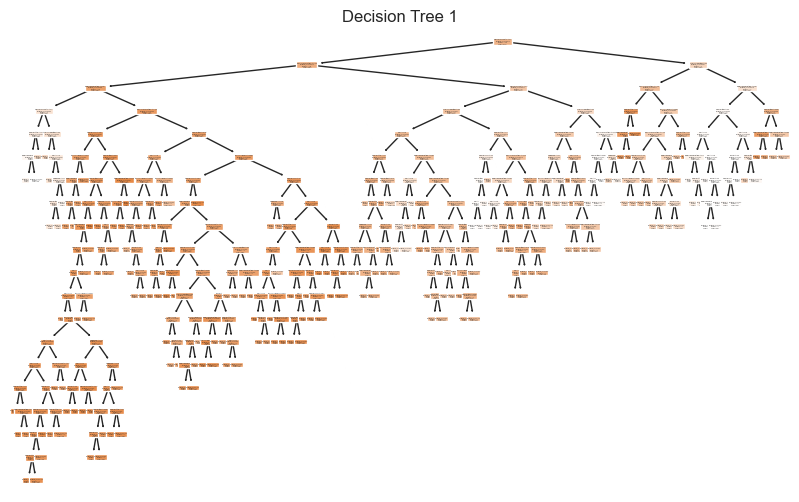

In [78]:
from sklearn import tree
decision_trees = forest_model.estimators_

# Plot each decision tree
tree_number = 1

plt.figure(figsize=(10, 6))
tree.plot_tree(decision_trees[tree_number], feature_names=data.columns.tolist(), filled=True)
plt.title(f'Decision Tree {tree_number}')
plt.show()


### Using the model for new predictions
After the AI model was trained we can use it for predicting sleep efficiency with new data.

We are creating a new dataframe to be able to predict the target.

In [79]:
new_data = pd.DataFrame(columns=x_test_data.columns)

new_row_data = {
    'Age': 30, 
    'Gender':1, 
    'Sleep duration': 7, 
    'REM sleep percentage': 22 , 
    'Deep sleep percentage': 20, 
    'Awakenings':3.0,
    'Caffeine consumption':25.0,
    'Alcohol consumption': 2.0,
    'Smoking status': 1,
    'Exercise frequency': 3.0,
    'Bedtime_hour': 22
    }

new_data.loc[len(new_data)]=new_row_data
new_data.head()


,Age,Gender,Sleep duration,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_hour
0,30,1,7,22,20,3.0,25.0,2.0,1,3.0,22


It is very important to use the values in the same scale as the ones that you trained your model.

> When you want to scale the data for predicting, whether you are doing this on test data from the original dataset or new values, you need to use the **scaler.transform()** instead of **scaler.fit_transform**

In [80]:
scaled_data = pd.DataFrame(scaler.transform(new_data), columns=new_data.columns)

linear_predicted_value = linear_model.predict(scaled_data)
forest_predicted_value = forest_model.predict(scaled_data)

print(linear_predicted_value)
print(forest_predicted_value)

[[4.65490968]]
[0.7702]
